In [13]:
# PREPROCESSING

import os
import pandas as pd
from sklearn.model_selection import train_test_split


base_path = r"C:\Users\ASUS ViVoBook\Downloads\Portfolio\AI\spam_classifier_project\dataset"
path = os.path.join(base_path, "spam.csv")

# READ DATA
df = pd.read_csv(path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# SPLIT DATA
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# COMBINE DATA (TEXT AND LABELS INTO DATAFRAMES FOR SAVING)
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

# CREATE FOLDERS
train_dir = os.path.join(base_path, "train")
test_dir = os.path.join(base_path, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# SAVE FILES
train_df.to_csv(os.path.join(train_dir,"train_data.csv"), index=False)
test_df.to_csv(os.path.join(test_dir, "test_data.csv"), index=False)


print(f"Train data saved to: {train_dir}")
print(f"Test data saved to: {test_dir}")
df.head()


Train data saved to: C:\Users\ASUS ViVoBook\Downloads\Portfolio\AI\spam_classifier_project\dataset\train
Test data saved to: C:\Users\ASUS ViVoBook\Downloads\Portfolio\AI\spam_classifier_project\dataset\test


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Training complete!

Accuracy: 0.9695067264573991

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy and Classification Report Saved


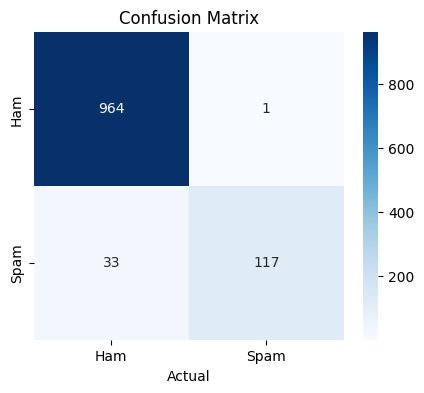

Confusion Matrix Saved

 Sample message prediction: SPAM


In [ ]:
# TRAIN

import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# PATH
path = r"C:\Users\ASUS ViVoBook\Downloads\Portfolio\AI\spam_classifier_project"
dataset_path = os.path.join(path, "dataset")
train_path = os.path.join(dataset_path, "train", "train_data.csv")
test_path = os.path.join(dataset_path, "test", "test_data.csv")
results_path = os.path.join(path, "results")
os.makedirs(results_path, exist_ok=True)

# LOAD DATA
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# DATA CLEANING
train_df = train_df.dropna(subset=['text', 'label'])
test_df = test_df.dropna(subset=['text', 'label'])

train_df['text'] = train_df['text'].astype(str).replace('nan', '')
test_df['text'] = test_df['text'].astype(str).replace('nan', '')

# FIX LABEL
train_df['label'] = pd.to_numeric(train_df['label'], errors = 'coerce')
test_df['label'] = pd.to_numeric(test_df['label'], errors = 'coerce')

X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Training complete!\n")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


# Accuracy and Classification Report Visualization
plt.figure(figsize=(7,4))
plt.text(0.01, 0.9, f"Accuracy: {accuracy: .4f}", fontsize=12, fontweight='bold')
plt.text(0.01, 0.8, f"Classification Report:", fontsize=12, fontweight='bold')
plt.text(0.01, 0.1, report, fontsize=10, family='monospace')
plt.axis('off')
plt.title('Model Evaluation Results', fontsize=14, fontweight='bold')
report_path = os.path.join(results_path, "classification_report.png")
plt.savefig(report_path, bbox_inches='tight', dpi=300)
plt.close()
print(f"Accuracy and Classification Report Saved")


# VISUALIZATION
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')

cm_path = os.path.join(results_path, "confusion_matrix.png")
plt.savefig(cm_path, bbox_inches='tight', dpi=300)
plt.show()
print(f"Confusion Matrix Saved")

# Save model and vectorizer
model_path = os.path.join(results_path, "spam_model.pkl")
vectorizer_path = os.path.join(results_path, "vectorizer.pkl")
joblib.dump(model, model_path)
joblib.dump(vectorizer, vectorizer_path)

#EXAMPLE
sample = ["Congratulations! You have won a $1000 Walmart gift card! Click here to claim now."]
sample_tfidf = vectorizer.transform(sample)
pred = model.predict(sample_tfidf)
print(f"\n Sample message prediction: {'SPAM' if pred[0] == 1 else 'HAM'}")
